In [45]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [ ]:
from sklearn.datasets import load_breast_cancer
bcancer = datasets.load_breast_cancer()
X = bcancer.data  
Y = bcancer.target

In [48]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

In [49]:
additional_metrics = ['acc']
loss_function = BinaryCrossentropy()
number_of_epochs = 7000
optimizer = Adam()
verbosity_mode = 0
layer_size = 10

In [50]:
model = Sequential()
model.add(Dense(layer_size,input_dim=5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [51]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [53]:
x_neg_0=np.zeros(50)
x_pos_0=np.ones(100)

In [54]:
#first class negative, rest two positive
x_neg=iris.data[0:50]
x_pos=iris.data[50:150]


In [55]:
x_negt = np.insert(x_neg, 4, x_neg_0, axis=1)
x_post = np.insert(x_pos, 4, x_pos_0, axis=1)


In [56]:
x_train = np.concatenate((x_post, x_negt)).reshape(-1, 5)
y_train = np.concatenate((np.zeros(50),np.ones(100))).reshape(-1, 1).astype(int)
print(x_train)

[[7.  3.2 4.7 1.4 1. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.9 3.1 4.9 1.5 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.5 2.8 4.6 1.5 1. ]
 [5.7 2.8 4.5 1.3 1. ]
 [6.3 3.3 4.7 1.6 1. ]
 [4.9 2.4 3.3 1.  1. ]
 [6.6 2.9 4.6 1.3 1. ]
 [5.2 2.7 3.9 1.4 1. ]
 [5.  2.  3.5 1.  1. ]
 [5.9 3.  4.2 1.5 1. ]
 [6.  2.2 4.  1.  1. ]
 [6.1 2.9 4.7 1.4 1. ]
 [5.6 2.9 3.6 1.3 1. ]
 [6.7 3.1 4.4 1.4 1. ]
 [5.6 3.  4.5 1.5 1. ]
 [5.8 2.7 4.1 1.  1. ]
 [6.2 2.2 4.5 1.5 1. ]
 [5.6 2.5 3.9 1.1 1. ]
 [5.9 3.2 4.8 1.8 1. ]
 [6.1 2.8 4.  1.3 1. ]
 [6.3 2.5 4.9 1.5 1. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.4 2.9 4.3 1.3 1. ]
 [6.6 3.  4.4 1.4 1. ]
 [6.8 2.8 4.8 1.4 1. ]
 [6.7 3.  5.  1.7 1. ]
 [6.  2.9 4.5 1.5 1. ]
 [5.7 2.6 3.5 1.  1. ]
 [5.5 2.4 3.8 1.1 1. ]
 [5.5 2.4 3.7 1.  1. ]
 [5.8 2.7 3.9 1.2 1. ]
 [6.  2.7 5.1 1.6 1. ]
 [5.4 3.  4.5 1.5 1. ]
 [6.  3.4 4.5 1.6 1. ]
 [6.7 3.1 4.7 1.5 1. ]
 [6.3 2.3 4.4 1.3 1. ]
 [5.6 3.  4.1 1.3 1. ]
 [5.5 2.5 4.  1.3 1. ]
 [5.5 2.6 4.4 1.2 1. ]
 [6.1 3.  4.6 1.4 1. ]
 [5.8 2.6 4.  1.2 1. ]
 [5.  2.3 3

In [61]:
#first class positive, rest two negative
x_pos=iris.data[0:50]
x_neg=iris.data[50:150]
x_train = np.concatenate((x_pos, x_neg)).reshape(-1, 4)
y_train = np.concatenate((np.ones(50), np.zeros(100))).reshape(-1, 1).astype(int)

In [10]:
#first two classes positive, last one negative
x_pos=iris.data[0:100]
x_neg=iris.data[100:150]
x_train = np.concatenate((x_pos, x_neg)).reshape(-1, 4)
y_train = np.concatenate((np.ones(100), np.zeros(50))).reshape(-1, 1).astype(int)

In [57]:
#new_data = []
#mean=np.mean(x_train)
#std = np.std(x_train)
#for x in x_train:
 #   new_data += [(x-mean)/std]
#x_train = np.array(new_data)

## Easier ways to this
## method 1
# x_train = (x - np.mean(x)) / np.std(x) # this happens because of numpy broadcasting. it is also faster.

## method 2
from sklearn.preprocessing import StandardScaler 
x_train = StandardScaler().fit_transform(x_train)

In [58]:
x_n=np.concatenate((np.ones(30),np.zeros(20)))
x_test=x_neg
np.random.shuffle(x_test)
x_test=np.insert(x_test, 4, x_n, axis=1).reshape(-1,5)
y_test=np.zeros(50).reshape(-1,1)
print(y_test)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [59]:
x_train.shape

(150, 5)

In [60]:
y_train.shape

(150, 1)

## Model training

In [61]:
batch_size = len(x_train)

In [62]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

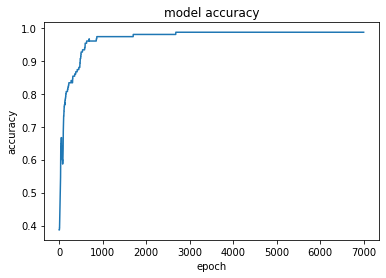

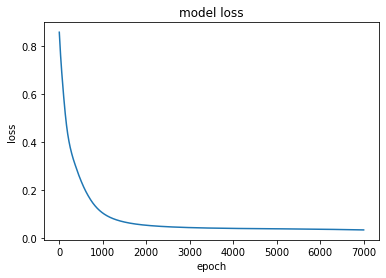

In [63]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

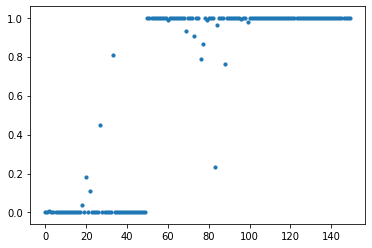

In [64]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [65]:
layer_size = 3
number_of_epochs = 2000
model = Sequential()


In [66]:
model.add(Dense(layer_size,input_dim=5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


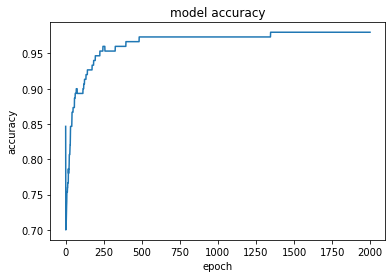

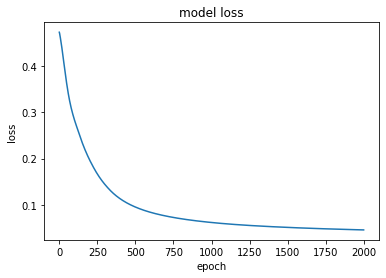

In [67]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=5
#epochs 2000

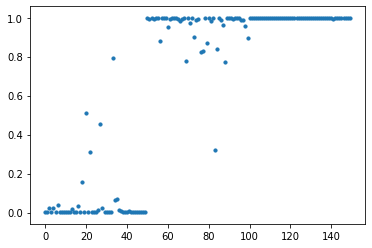

In [68]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [25]:
layer_size = 1
number_of_epochs = 2000
model = Sequential()
model.add(Dense(layer_size,input_dim=5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


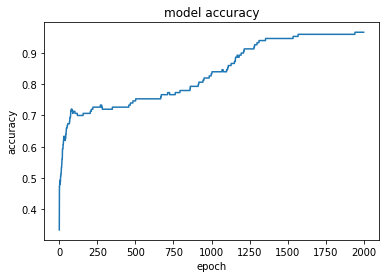

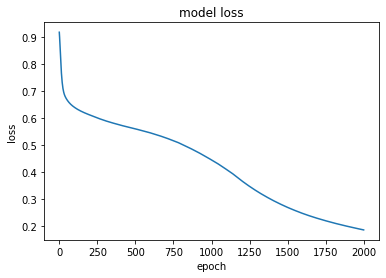

In [46]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=2

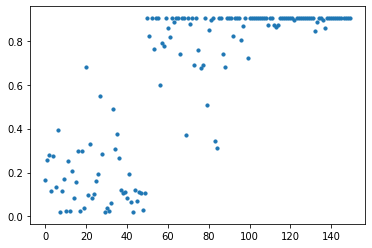

In [47]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [69]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict(x_train)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict(x)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)

#(Input:bloom filter,number array,ratio; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,nums):
    pred = bf.predict(x_train)
    tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel() 
    return fp/(fp+tn)

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


def fpr_test(x,bf,y_train):
    pred=bf.predict(x)
    fp=0;
    tn=0;
    for i in range(len(pred)):
        if((pred[i]==1)and(y_train[i]==0)):
            fp+=1
        if((pred[i]==0) and (y_train[i]==0)):
            tn+=1
        if((pred[i]==0) and (y_train[i]==1)):
            return -1
    return fp/(fp+tn)
#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [82]:
m=10

In [83]:
bf=BloomFilter(m,model)

In [84]:
bf.add_init(x_train,y_train)

In [85]:
from sklearn.metrics import confusion_matrix
pred = bf.predict(x_train)
tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel() # ravel opens up the 2x2 matrix
print(tn)
print(tp)
print(fp)
print(fn)

48
100
2
0


In [86]:
print(fpr_kraska_hash(bf,x_train))

0.04


In [87]:
print(fpr_test(x_test,bf,y_test))

0.02
